# To Do
Coba cari asosiasi antara produk menggunakan dataset yang terlampir dan menggunakan metode apriori
Apa yang harus ada?
* Display data
* Tampilan 2 asosiasi terbesar

Step by step kurang lebih seperti di notebook yang ada di material

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
transactions = [
    ['beer', 'wine', 'cheese'],
    ['beer', 'potato chips'],
    ['eggs', 'flower', 'butter', 'cheese'],
    ['eggs', 'flower', 'butter', 'beer', 'potato chips'],
    ['wine', 'cheese'],
    ['potato chips'],
    ['eggs', 'flower', 'butter', 'wine', 'cheese'],
    ['eggs', 'flower', 'butter', 'beer', 'potato chips'],
    ['wine', 'beer'],
    ['beer', 'potato chips'],
    ['butter', 'eggs'],
    ['beer', 'potato chips'],
    ['flower', 'eggs'],
    ['beer', 'potato chips'],
    ['eggs', 'flower', 'butter', 'wine', 'cheese'],
    ['beer', 'wine', 'potato chips', 'cheese'],
    ['wine', 'cheese'],
    ['beer', 'potato chips'],
    ['wine', 'cheese'],
    ['beer', 'potato chips']
]

In [5]:
data1 = pd.DataFrame(transactions)

In [6]:
data1.shape

(20, 5)

In [7]:
data1.head()

,0,1,2,3,4
0,beer,wine,cheese,None,None
1,beer,potato chips,None,None,None
2,eggs,flower,butter,cheese,None
3,eggs,flower,butter,beer,potato chips
4,wine,cheese,None,None,None


In [8]:
data1.tail()

,0,1,2,3,4
15,beer,wine,potato chips,cheese,None
16,wine,cheese,None,None,None
17,beer,potato chips,None,None,None
18,wine,cheese,None,None,None
19,beer,potato chips,None,None,None


In [9]:
data1.sample(10)

,0,1,2,3,4
8,wine,beer,None,None,None
11,beer,potato chips,None,None,None
2,eggs,flower,butter,cheese,None
12,flower,eggs,None,None,None
14,eggs,flower,butter,wine,cheese
3,eggs,flower,butter,beer,potato chips
18,wine,cheese,None,None,None
10,butter,eggs,None,None,None
6,eggs,flower,butter,wine,cheese
7,eggs,flower,butter,beer,potato chips


In [10]:
data1.describe()

,0,1,2,3,4
count,20,19,7,6,4
unique,6,6,3,3,2
top,beer,potato chips,butter,cheese,potato chips
freq,8,6,5,2,2


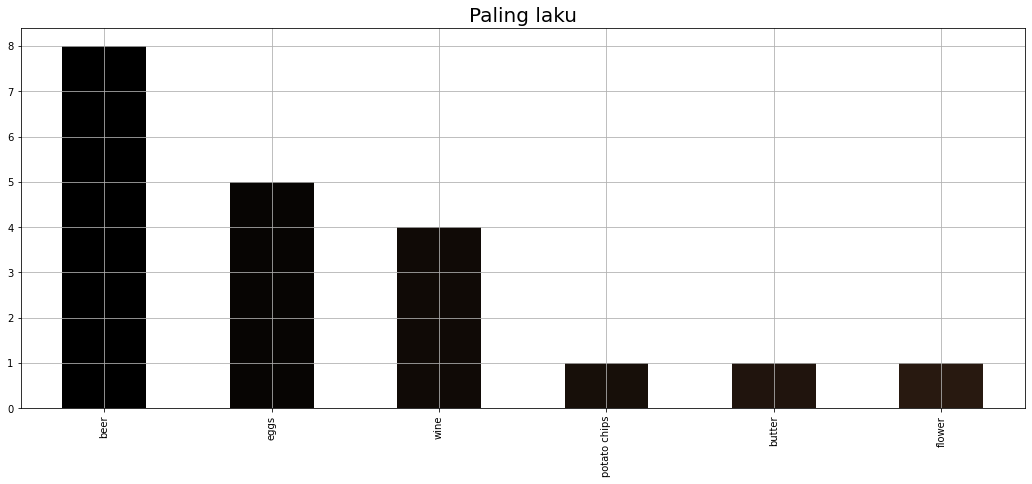

In [11]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
data1[0].value_counts().head(40).plot.bar(color = color)
plt.title('Paling laku', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [12]:
min_n_products = 2
min_support = 7/len(transactions)
max_length = data1.shape[1]

In [13]:
from pyECLAT import ECLAT

my_eclat = ECLAT(data=data1, verbose=True)

100%|██████████| 8/8 [00:00<00:00, 2005.52it/s]


In [14]:
rule_indices, rule_supports = my_eclat.fit(min_support=min_support,
                                           min_combination=min_n_products,
                                           max_combination=max_length)

Combination 2 by 2


10it [00:00, 189.91it/s]


Combination 3 by 3


10it [00:00, 250.56it/s]


Combination 4 by 4


5it [00:00, 244.61it/s]


Combination 5 by 5


1it [00:00, 103.95it/s]


In [15]:
rule_supports

{'wine & cheese': 0.35, 'beer & potato chips': 0.45}

In [16]:
rule_indices

{'wine & cheese': [0, 4, 6, 14, 15, 16, 18],
 'beer & potato chips': [1, 3, 7, 9, 11, 13, 15, 17, 19]}

In [17]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,beer,butter,cheese,eggs,flower,potato chips,wine
0,True,False,True,False,False,False,True
1,True,False,False,False,False,True,False
2,False,True,True,True,True,False,False
3,True,True,False,True,True,True,False
4,False,False,True,False,False,False,True
5,False,False,False,False,False,True,False
6,False,True,True,True,True,False,True
7,True,True,False,True,True,True,False
8,True,False,False,False,False,False,True
9,True,False,False,False,False,True,False


In [23]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support)

,support,itemsets
0,0.55,(0)
1,0.40,(2)
2,0.35,(3)
3,0.50,(5)
4,0.40,(6)
5,0.45,"(0, 5)"
6,0.35,"(2, 6)"


In [24]:
apriori(df, min_support, use_colnames=True)

,support,itemsets
0,0.55,(beer)
1,0.40,(cheese)
2,0.35,(eggs)
3,0.50,(potato chips)
4,0.40,(wine)
5,0.45,"(potato chips, beer)"
6,0.35,"(wine, cheese)"


In [25]:
frequent_itemsets = apriori(df, min_support, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.55,(beer),1
1,0.40,(cheese),1
2,0.35,(eggs),1
3,0.50,(potato chips),1
4,0.40,(wine),1
5,0.45,"(potato chips, beer)",2
6,0.35,"(wine, cheese)",2


In [27]:
frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= min_support) ]

,support,itemsets,length
5,0.45,"(potato chips, beer)",2
6,0.35,"(wine, cheese)",2
